# Census Income Project

#### Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re


In [2]:
#reading csv and storing it in df
#using double slash because of unicode error
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


- dataset has 32560 datas 
- 14 features and 1 target 

#### checking nulls

In [3]:
df.isnull().sum().sum()

0

no nulls are present

#### checking datatype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


dataset has a combination of numerical and object data type

#### check for duplicates

In [5]:
df.duplicated().sum()

24

has duplicates

In [6]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32532,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32533,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32534,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df.duplicated().sum()

0

#### Checking for unique values in each columns

In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [10]:
df.Marital_status=df.Marital_status.replace([' Married-spouse-absent',' Married-civ-spouse',' Married-AF-spouse'],' Married')
df.Marital_status=df.Marital_status.replace([' Separated',' Divorced'],'Divorced')
df.Marital_status=df.Marital_status.replace([' Never-married'],'Single')
df.Marital_status=df.Marital_status.replace([' Widowed'],'Widowed')


In [11]:
df['Marital_status'].unique()

array([' Married', 'Divorced', 'Single', 'Widowed'], dtype=object)

In [12]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [13]:
df.Workclass=df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov'],'Govt-Sector')
df.Workclass=df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc'],'Pvt-sector')
df.Workclass=df.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')
df.Workclass=df.Workclass.replace([' ?'],'Others')

In [14]:
df['Workclass'].unique()

array(['Pvt-sector', 'Govt-Sector', 'Others', 'Not-working'], dtype=object)

In [15]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [16]:
df.Education=df.Education.replace([' Bachelors'],'Bachelors')
df.Education=df.Education.replace([' HS-grad'],'HS-grad')
df.Education=df.Education.replace([ ' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th',' Preschool', ' 12th'],'School')
df.Education=df.Education.replace([ ' Masters'],'Masters')
df.Education=df.Education.replace([ ' Some-college', ' Prof-school'],' College')
df.Education=df.Education.replace([ ' Assoc-acdm', ' Assoc-voc'],' Associates')
df.Education=df.Education.replace([ ' Doctorate'],'PhD')


In [17]:
df['Education'].unique()

array(['Bachelors', 'HS-grad', 'School', 'Masters', ' College',
       ' Associates', 'PhD'], dtype=object)

In [18]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [19]:
df.Native_country=df.Native_country.replace([' ?'],'Others')

In [20]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'Others',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [21]:
for i in df.index:
    df.loc[i,'Native_country']=re.sub(r"\s+", "",df.loc[i,'Native_country'])
df['Native_country'].unique()    

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Others', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [22]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [23]:
df.Occupation=df.Occupation.replace([' ?'],'Others')
for i in df.index:
    df.loc[i,'Occupation']=re.sub(r"\s+", "",df.loc[i,'Occupation'])
df['Occupation'].unique()    

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Others', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [24]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [25]:
for i in df.index:
    df.loc[i,'Relationship']=re.sub(r"\s+", "",df.loc[i,'Relationship'])
df['Relationship'].unique() 

array(['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [26]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [27]:
for i in df.index:
    df.loc[i,'Race']=re.sub(r"\s+", "",df.loc[i,'Race'])
df['Race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [28]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [29]:
for i in df.index:
    df.loc[i,'Sex']=re.sub(r"\s+", "",df.loc[i,'Sex'])
df['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [30]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [31]:
for i in df.index:
    df.loc[i,'Income']=re.sub(r"\s+", "",df.loc[i,'Income'])
df['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

#### seperating numerical and categorical data type

In [32]:
numericalCol=df.select_dtypes(include=np.number).columns
print("The numerical columns are:",numericalCol)
print('\n')
objectColumns=df.select_dtypes(include=np.object).columns
print("The categorical columns are:",objectColumns)

The numerical columns are: Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')


The categorical columns are: Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


In [33]:
discretecols=[]
continuecols=[]

for column in numericalCol:
     if df[column].nunique()>50:
        continuecols.append(column)
     
     else:
        discretecols.append(column)
        
print("The discrete columns are:",discretecols)
print('\n')
print("The continuous columns are:",continuecols) 

The discrete columns are: ['Education_num']


The continuous columns are: ['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


#### checking how the data is defined statistically for numerical continuous datas and visualising

In [34]:
df[continuecols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


- Age
    - mean to std ratio is 2.9
    - min age is 17 max aage is 90
    - the difference between 75% and max is high compared to min-25%, 50%-25% and 75%-50%
    - large population of people in the survey are in their 30s
    
- Fnlwgt
    - mean to std ratio is 1.79
    - min is 12285 max is 1484705
    - the differnce between each quantile is not uniform in 25%-min and max-75%
    - most of the  population has Fnlwgt in 111700-180000

- Capital_gain
    - mean to std ratio is 0.14
    - min is 0 max is 99999
    - large population has capital gain of 0
    - around 159 people has capital gain of 99999
    
- Capital_loss
    - mean to std ratio is 0.21
    - min is 0 and max is 4356
    - large population of people have capital loss of 0 
    - only 3 people have capital loss of 4356

- Hours_per_week
    - mean to std is 3.3
    - min 1 max 99
    

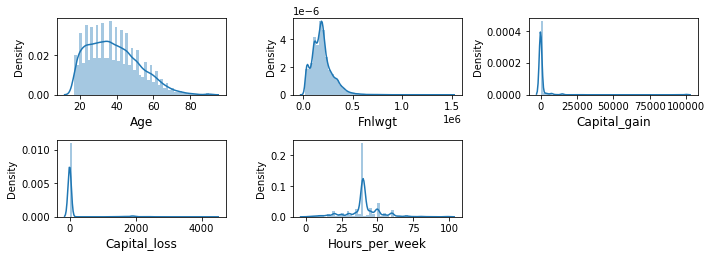

In [35]:
# plotting distribution graph 
j=0
plt.figure(figsize=(10,10))
for column in df[continuecols]:
    plt.subplot(6,3,j+1)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- Age
    - positively skewed
    - values in range from 20-80
    - mean age is around 35

- Fnlwgt
    - positively skewed
    - value in range 0.012 to 0.5 e6
    - mean value is around 0.25 e6
    
- Capital_gain and Capital_loss
    - not uniformly distributed
    - presence of outliers due to extremely high value
    
- Hours_per_week
    - values are scattered with concentration of certain values

#### checking how the data is defined statistically for numerical discrete datas and visualising

In [36]:
df[discretecols].describe().T

,count,mean,std,min,25%,50%,75%,max
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.0,16.0


                      total  percent with total population
Income Education_num                                      
<=50K  9               8820                       0.271084
       10              5896                       0.181215
       13              3131                       0.096232
       7               1115                       0.034270
       11              1021                       0.031381
       6                871                       0.026770
       12               802                       0.024650
       14               763                       0.023451
       4                605                       0.018595
       5                487                       0.014968
       8                400                       0.012294
       3                316                       0.009712
       2                160                       0.004918
       15               153                       0.004702
       16               107                       0.0032

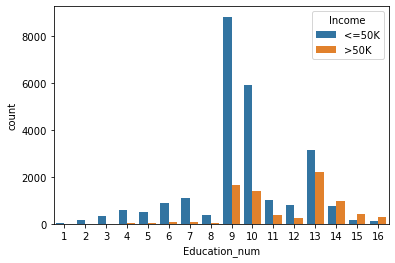

In [37]:
total= df['Education_num'].groupby(df['Income']).value_counts()
percent = df['Education_num'].groupby(df['Income']).value_counts() / df.shape[0]
df_ed = pd.concat([total,percent],keys = ['total','percent with total population'],axis = 1)
print(df_ed)
sns.countplot(df['Education_num'],hue=df['Income'])
plt.show()

- 9 has largest no. of people who belong to Income <= 50k
- 1 has the highest percentage of people who earn <50k followed by 3

- 13 has largest no . of people who belong to Income > 50k
- 16 has the highest perecentage of people who earn more than 50k, followed by 15 

#### checking how the data is defined statistically for categorical datas`and visualising

In [38]:
df[objectColumns].describe(include=['O'])

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32536,32536,32536,32536,32536,32536,32536,32536,32536
unique,4,7,4,15,6,5,2,42,2
top,Pvt-sector,HS-grad,Married,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,26329,10494,15411,4136,13187,27794,21774,29152,24697


                    total  percentage with total population
Income Workclass                                           
<=50K  Pvt-sector   20022                          0.615380
       Govt-Sector   3009                          0.092482
       Others        1645                          0.050559
       Not-working     21                          0.000645
>50K   Pvt-sector    6307                          0.193847
       Govt-Sector   1341                          0.041216
       Others         191                          0.005870




Text(0, 0.5, 'Proportion of People')

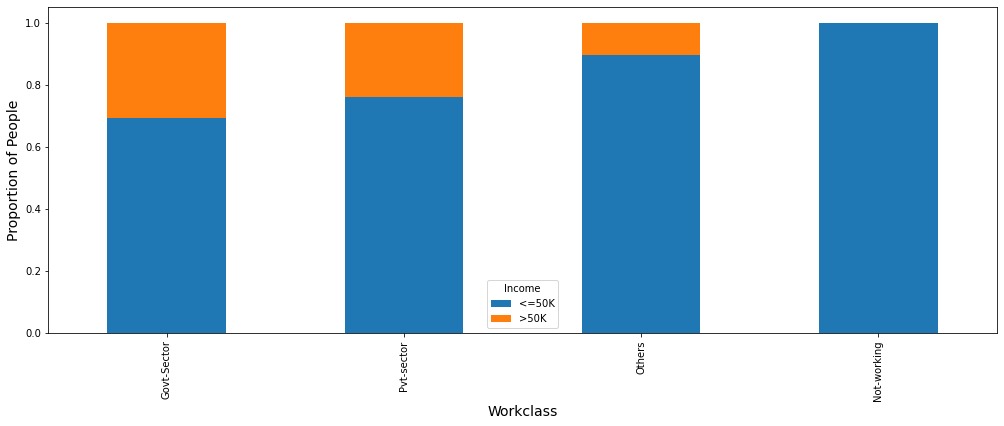

In [39]:
total= df['Workclass'].groupby(df['Income']).value_counts()
percent = df['Workclass'].groupby(df['Income']).value_counts() / df.shape[0]
df_o = pd.concat([total,percent],keys = ['total','percentage with total population'],axis = 1)
print(df_o)
print('\n')
  
table_workclass = pd.crosstab(df['Workclass'], df['Income'])
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6))
plt.xlabel('Workclass',fontsize = 14)
plt.ylabel('Proportion of People',fontsize = 14)

- greater than 50k
    - Private has most no of people belonging to this category count wise
    - govt sector has the highest propotion of people belonging to that group

- <= 50K
    - Private has the most no. of people belonging to this category count wise
    - not working has the highest propotion of people belonging to that group


                    total  percentage with total population
Income Education                                           
<=50K  HS-grad       8820                          0.271084
        College      6049                          0.185917
       School        4004                          0.123064
       Bachelors     3131                          0.096232
        Associates   1823                          0.056030
       Masters        763                          0.023451
       PhD            107                          0.003289
>50K   Bachelors     2221                          0.068263
        College      1809                          0.055600
       HS-grad       1674                          0.051451
       Masters        959                          0.029475
        Associates    626                          0.019240
       PhD            306                          0.009405
       School         244                          0.007499




Text(0, 0.5, 'Proportion of People')

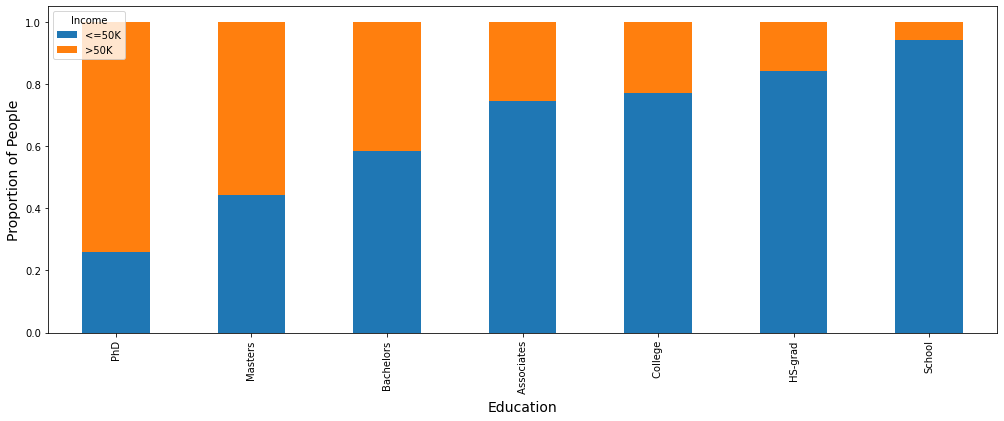

In [40]:
total= df['Education'].groupby(df['Income']).value_counts()
percent = df['Education'].groupby(df['Income']).value_counts() / df.shape[0]
df_o = pd.concat([total,percent],keys = ['total','percentage with total population'],axis = 1)
print(df_o)
print('\n')
  
table_education = pd.crosstab(df['Education'], df['Income'])
(table_education.div(table_education.sum(axis = 1),axis = 0)).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6))
plt.xlabel('Education',fontsize = 14)
plt.ylabel('Proportion of People',fontsize = 14)

- less than or equal to 50K
    - HS-grad has the highest count 
    - School has the highest propotion of people belonging to that group

- greater than 
    - Bachelors has the highest count 
    - PhD has the highest propotion of people belonging to that group

                       total  percentage with total population
Income Marital_status                                         
<=50K  Single          10175                          0.312731
        Married         8677                          0.266689
       Divorced         4937                          0.151740
       Widowed           908                          0.027908
>50K    Married         6734                          0.206971
       Divorced          529                          0.016259
       Single            491                          0.015091
       Widowed            85                          0.002612




Text(0, 0.5, 'Proportion of People')

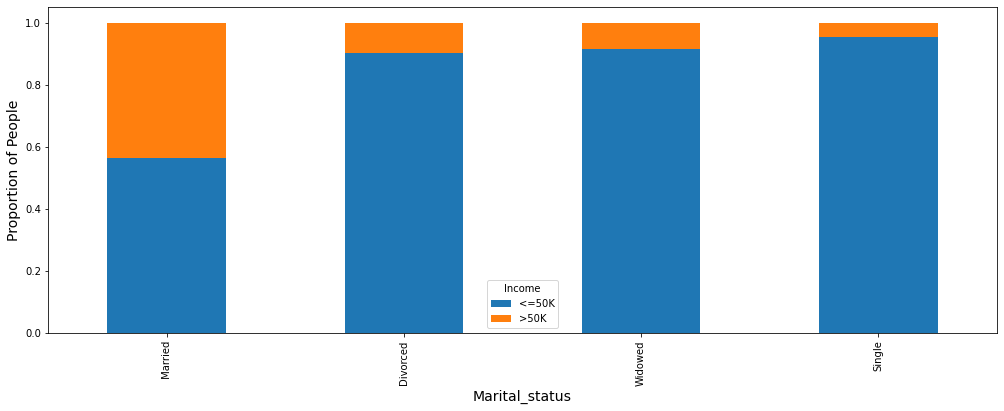

In [41]:
total= df['Marital_status'].groupby(df['Income']).value_counts()
percent = df['Marital_status'].groupby(df['Income']).value_counts() / df.shape[0]
df_o = pd.concat([total,percent],keys = ['total','percentage with total population'],axis = 1)
print(df_o)
print('\n')

table_marital_status = pd.crosstab(df['Marital_status'], df['Income'])
(table_marital_status.div(table_marital_status.sum(axis = 1),axis = 0)).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6))
plt.xlabel('Marital_status',fontsize = 14)
plt.ylabel('Proportion of People',fontsize = 14)

- less than or equal to 50K
    - Singles account for most no. of people count wise who have income <50K
    - Singles has the highest propotion of people belonging to that group
    
    
- greater than 50K   
    - Married people account for most no. of people count wise
    - Married has the highest propotion of people belonging to that group

                          total  percentage with total population
Income Occupation                                                
<=50K  Adm-clerical        3260                          0.100197
       Craft-repair        3165                          0.097277
       Other-service       3154                          0.096939
       Sales               2667                          0.081971
       Prof-specialty      2278                          0.070015
       Exec-managerial     2097                          0.064452
       Machine-op-inspct   1751                          0.053817
       Others              1652                          0.050775
       Handlers-cleaners   1283                          0.039433
       Transport-moving    1277                          0.039249
       Farming-fishing      877                          0.026955
       Tech-support         644                          0.019793
       Protective-serv      438                          0.013462
       Pri

Text(0, 0.5, 'Proportion of People')

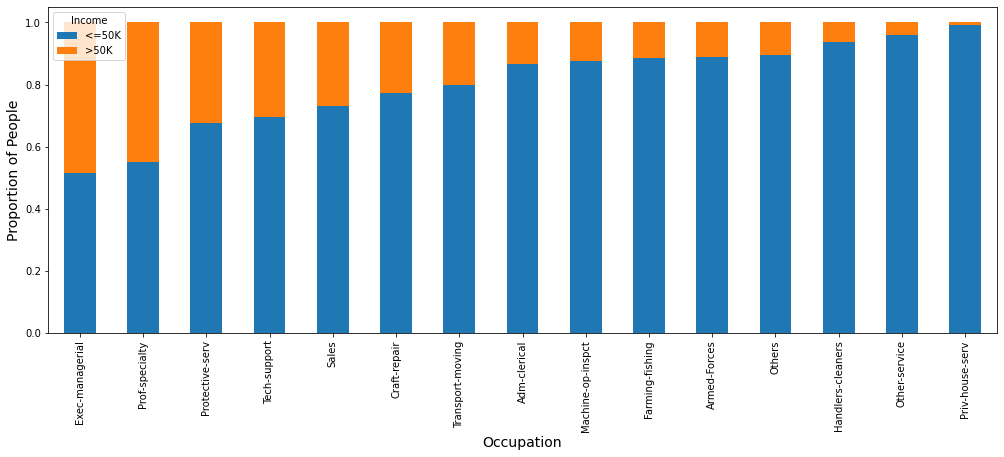

In [42]:
total= df['Occupation'].groupby(df['Income']).value_counts()
percent = df['Occupation'].groupby(df['Income']).value_counts() / df.shape[0]
df_o = pd.concat([total,percent],keys = ['total','percentage with total population'],axis = 1)
print(df_o)
print('\n')
  

table_occupation = pd.crosstab(df['Occupation'], df['Income'])
(table_occupation.div(table_occupation.sum(axis = 1),axis = 0)).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6))
plt.xlabel('Occupation',fontsize = 14)
plt.ylabel('Proportion of People',fontsize = 14)

- less than 50K
    - Adm-clerical followed by Craft-repair  has the highest count
    - Priv-house-serv  has the highest propotion of people belonging to that group
    
    
- greater than 50K
    - Exec-managerial followed by Prof-specialty has the highest count 
    - Exec-managerial has the highest propotion of people belonging to that group

                       total  percentage with total population
Income Relationship                                           
<=50K  Not-in-family    7435                          0.228516
       Husband          7271                          0.223476
       Own-child        4997                          0.153584
       Unmarried        3227                          0.099182
       Other-relative    944                          0.029014
       Wife              823                          0.025295
>50K   Husband          5916                          0.181829
       Not-in-family     856                          0.026309
       Wife              745                          0.022898
       Unmarried         218                          0.006700
       Own-child          67                          0.002059
       Other-relative     37                          0.001137




Text(0, 0.5, 'Proportion of People')

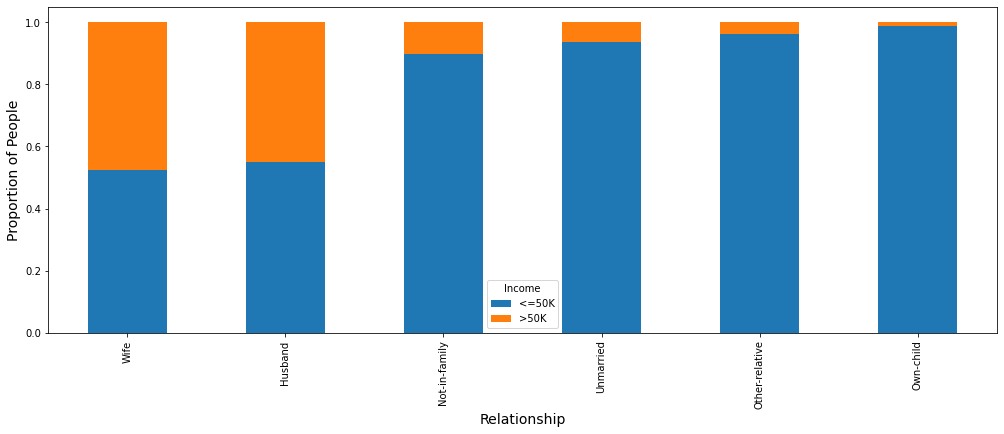

In [43]:
total= df['Relationship'].groupby(df['Income']).value_counts()
percent = df['Relationship'].groupby(df['Income']).value_counts() / df.shape[0]
df_o = pd.concat([total,percent],keys = ['total','percentage with total population'],axis = 1)
print(df_o)
print('\n')
  

table_relationship = pd.crosstab(df['Relationship'], df['Income'])
(table_relationship.div(table_relationship.sum(axis = 1),axis = 0)).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6))
plt.xlabel('Relationship',fontsize = 14)
plt.ylabel('Proportion of People',fontsize = 14)

- less than or equal to 50K
    - Not-in-family accounts for the most count wise
    - Own-child has the highest propotion of people belonging to that group
    
    
- greater than
    - Husband ccounts for the most count wise
    - Wife has the highest propotion of people belonging to that group

                           total  percentage with total population
Income Race                                                       
<=50K  White               20679                          0.635573
       Black                2735                          0.084061
       Asian-Pac-Islander    762                          0.023420
       Amer-Indian-Eskimo    275                          0.008452
       Other                 246                          0.007561
>50K   White                7115                          0.218681
       Black                 387                          0.011895
       Asian-Pac-Islander    276                          0.008483
       Amer-Indian-Eskimo     36                          0.001106
       Other                  25                          0.000768




Text(0, 0.5, 'Proportion of People')

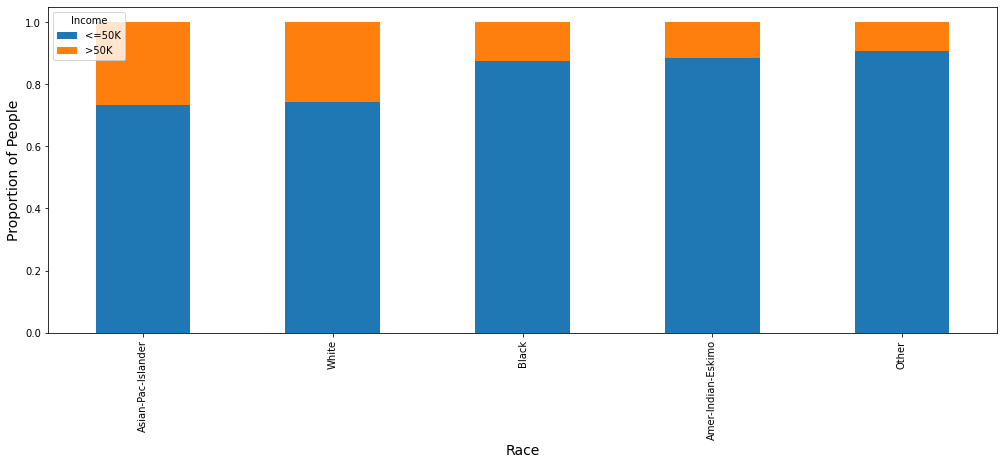

In [44]:
total= df['Race'].groupby(df['Income']).value_counts()
percent = df['Race'].groupby(df['Income']).value_counts() / df.shape[0]
df_o = pd.concat([total,percent],keys = ['total','percentage with total population'],axis = 1)
print(df_o)
print('\n')
  
table_race = pd.crosstab(df['Race'], df['Income'])
(table_race.div(table_race.sum(axis = 1),axis = 0)).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6))
plt.xlabel('Race',fontsize = 14)
plt.ylabel('Proportion of People',fontsize = 14)

- less than or equal to 50K
    - White accounts for the most count wise
    - Others has the highest propotion of people belonging to that group


- greater than 50K
    - White accounts for the most count wise
    - White and Asian-Pac-Islander has the highest propotion of people belonging to that group

               total  percentage with total population
Income Sex                                            
<=50K  Male    15114                          0.464532
       Female   9583                          0.294535
>50K   Male     6660                          0.204696
       Female   1179                          0.036237




Text(0, 0.5, 'Proportion of People')

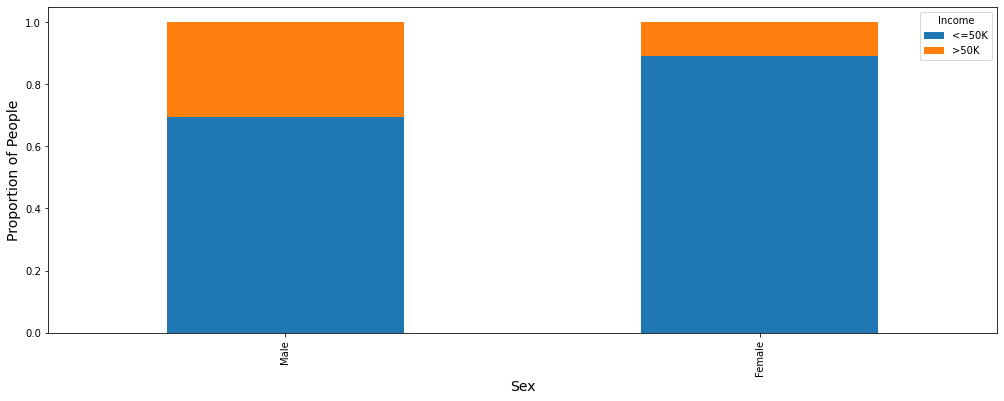

In [45]:
total= df['Sex'].groupby(df['Income']).value_counts()
percent = df['Sex'].groupby(df['Income']).value_counts() / df.shape[0]
df_o = pd.concat([total,percent],keys = ['total','percentage with total population'],axis = 1)
print(df_o)
print('\n')
  

table_gender = pd.crosstab(df['Sex'], df['Income'])
(table_gender.div(table_gender.sum(axis = 1),axis = 0)).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6))
plt.xlabel('Sex',fontsize = 14)
plt.ylabel('Proportion of People',fontsize = 14)

- less than or equal to 50K
    - Male accounts for the most count wise
    - Female has the highest propotion of people belonging to that group


- greater than 50K
    - Male accounts for the most count wise
    - Male has the highest propotion of people belonging to that group


                        total  percentage with total population
Income Native_country                                          
<=50K  United-States    21983                          0.675652
       Mexico             606                          0.018626
       Others             436                          0.013401
       Philippines        137                          0.004211
       Puerto-Rico        102                          0.003135
...                       ...                               ...
>50K   Laos                 2                          0.000061
       Nicaragua            2                          0.000061
       Peru                 2                          0.000061
       Trinadad&Tobago      2                          0.000061
       Honduras             1                          0.000031

[82 rows x 2 columns]




Text(0, 0.5, 'Proportion of People')

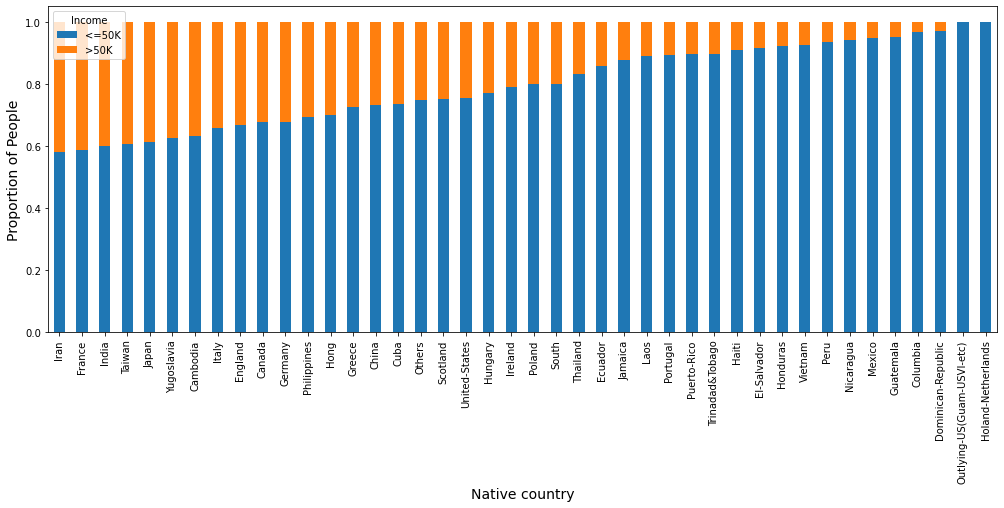

In [46]:
total= df['Native_country'].groupby(df['Income']).value_counts()
percent = df['Native_country'].groupby(df['Income']).value_counts() / df.shape[0]
df_o = pd.concat([total,percent],keys = ['total','percentage with total population'],axis = 1)
print(df_o)
print('\n')

table_country = pd.crosstab(df['Native_country'], df['Income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6))
plt.xlabel('Native country',fontsize = 14)
plt.ylabel('Proportion of People',fontsize = 14)

- less than or equal to 50K
    - count wise United-States has the most no of people
    - Holand-Netherlands has the highest propotion of people belonging to that group


- greater than 50K
    - count wise United-States has the most no of people
    - Iran has the highest propotion of people belonging to that group

<=50K    24697
>50K      7839
Name: Income, dtype: int64


Text(0, 0.5, 'Frequency')

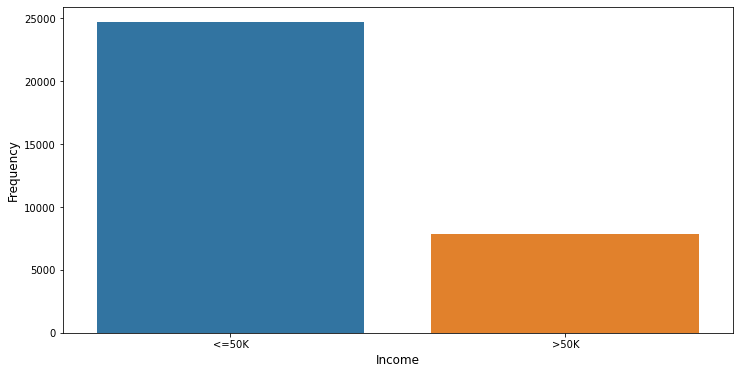

In [47]:
print(df['Income'].value_counts())

plt.figure(figsize =(12,6))
sns.countplot(x = 'Income', data = df)
plt.xlabel("Income",fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)

- large portion of the people earn below or equal to 50K
- the data is imbalanced need to use techniques to make it balanced

#### Bivariate analysis

<AxesSubplot:xlabel='Sex', ylabel='Hours_per_week'>

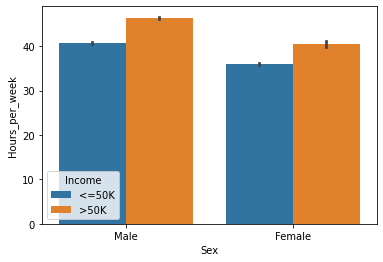

In [48]:
sns.barplot(df.Sex,df['Hours_per_week'],hue=df['Income'])

Text(0, 0.5, 'Capital Gain')

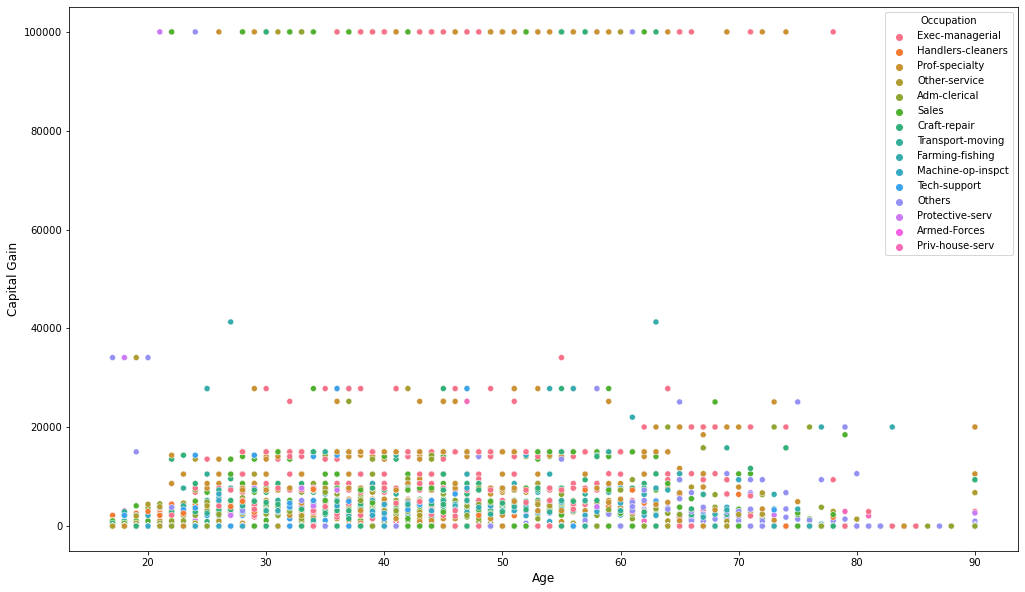

In [49]:
fig = plt.figure(figsize = (17,10))
sns.scatterplot('Age', 'Capital_gain', data = df,hue='Occupation')
plt.xlabel('Age',fontsize = 12)
plt.ylabel('Capital Gain',fontsize = 12)

- it can been seen that there is rise of capital gain from age 17 to 28 where capital gain reached 15000
- for age group 29-64 the capital gain is stable having value 15000
- for age group 65-88 the capital gain decreases to almost 0
- sudden jump in capital gain at age 90
- few people in age group 22-77 has capital gain of 100000

Text(0, 0.5, 'Capital Loss')

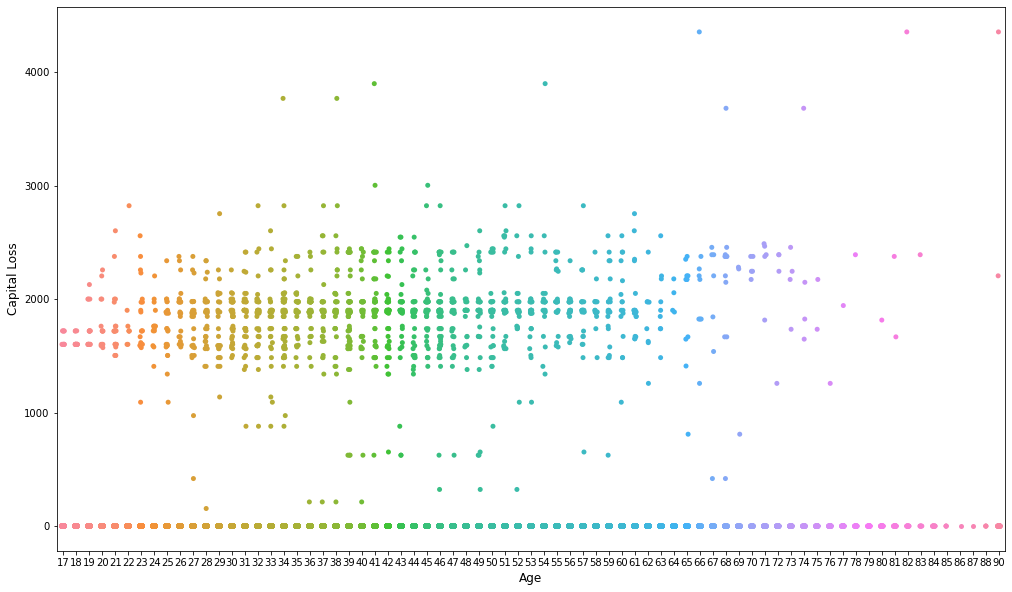

In [50]:
fig = plt.figure(figsize = (17,10))
sns.stripplot('Age', 'Capital_loss', data = df)
plt.xlabel('Age',fontsize = 12)
plt.ylabel('Capital Loss',fontsize = 12)

- 17-60 age group there is capital loss of 15000
- for age group from 61-90 the data is scattered
- there is a age group where 17-90 have zero capital loss

Text(0, 0.5, 'Capital_gain')

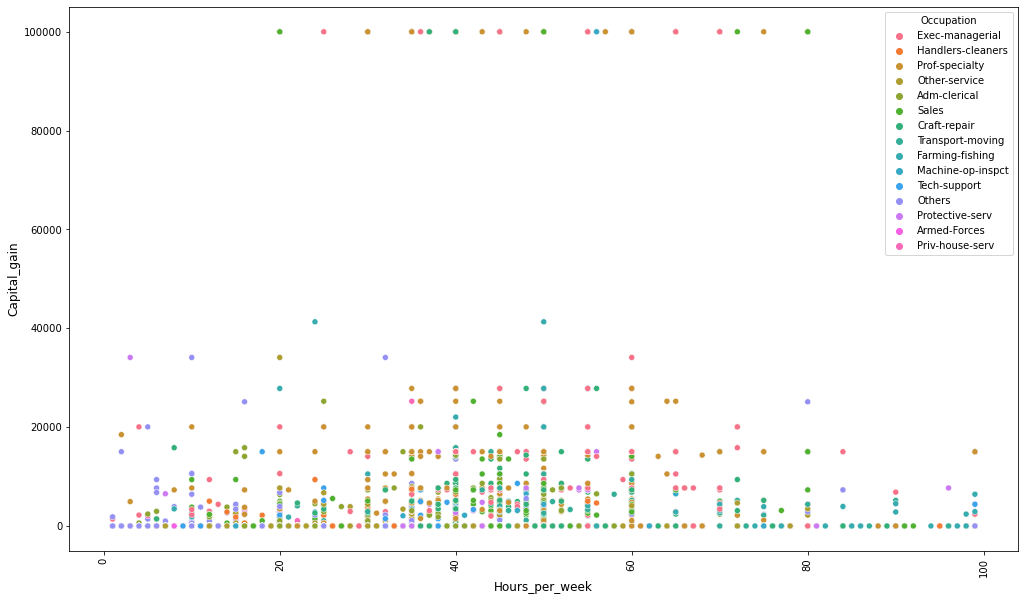

In [51]:
fig = plt.figure(figsize = (17,10))
sns.scatterplot('Hours_per_week', 'Capital_gain',hue='Occupation', data = df)
plt.xlabel('Hours_per_week',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Capital_gain',fontsize = 12)

Text(0.5, 0, 'Age')

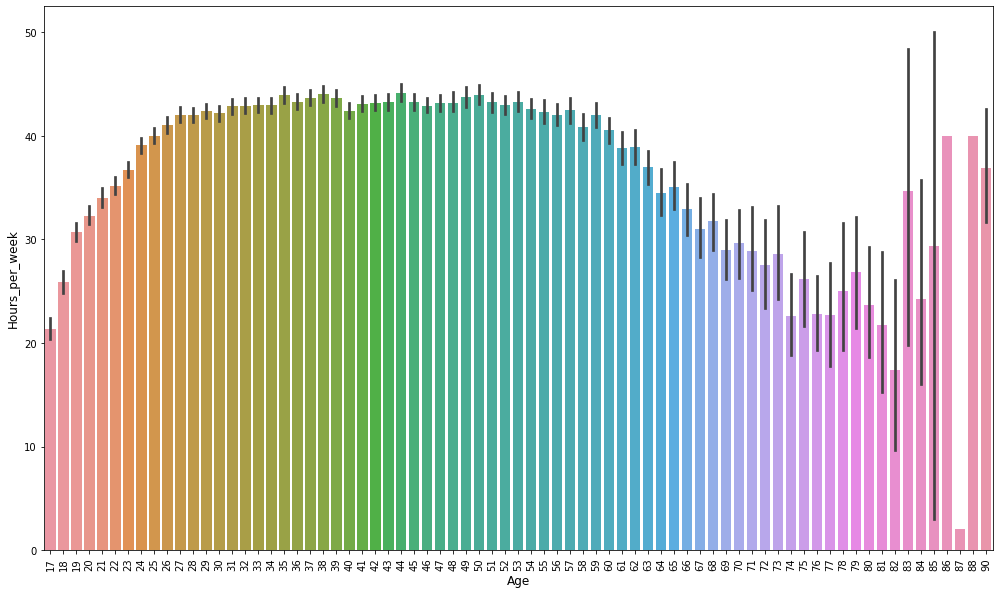

In [57]:
fig = plt.figure(figsize = (17,10))
sns.barplot(y='Hours_per_week', x='Age', data = df)
plt.ylabel('Hours_per_week',fontsize = 12)
plt.xticks(rotation=90)
plt.xlabel('Age',fontsize = 12)

- the hours_per_week increases from 17-25
- then it stabilises to avg of 38 hours_per_week for age grop 26-62
- then it decreases from age group 63-77

#### check skewness

In [66]:
df.skew()[continuecols].sort_values()

Hours_per_week     0.228752
Age                0.557657
Fnlwgt             1.447695
Capital_loss       4.592622
Capital_gain      11.949245
dtype: float64

Fnlwgt, Capital_loss, Capital_gain have skewness more than acceptable limits

In [67]:
cols_to_be_checked=['Fnlwgt', 'Capital_loss', 'Capital_gain']
for col in cols_to_be_checked:
    df[col]=np.sqrt(df[col])
df.skew()[continuecols].sort_values() 

Fnlwgt            0.189598
Hours_per_week    0.228752
Age               0.557657
Capital_loss      4.374422
Capital_gain      5.892641
dtype: float64

In [68]:
cols_to_be_checked=['Fnlwgt', 'Capital_loss', 'Capital_gain']
for col in cols_to_be_checked:
    df[col]=np.cbrt(df[col])
df.skew()[continuecols].sort_values()  

Fnlwgt           -0.505852
Hours_per_week    0.228752
Age               0.557657
Capital_gain      3.226138
Capital_loss      4.308589
dtype: float64

- i tried using power transform but few datas are becoming nans 

skewness can't be further treated 

#### Encoding 

In [69]:
Income={'<=50K':0,'>50K':1}
df['Income'] = df['Income'].map(Income )


In [70]:
df['Income'].unique()

array([0, 1], dtype=int64)

In [71]:
objcol=['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country']

In [72]:
df=pd.get_dummies(columns=objcol, drop_first = True,data=df)
df

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_Not-working,Workclass_Others,Workclass_Pvt-sector,...,Native_country_Portugal,Native_country_Puerto-Rico,Native_country_Scotland,Native_country_South,Native_country_Taiwan,Native_country_Thailand,Native_country_Trinadad&Tobago,Native_country_United-States,Native_country_Vietnam,Native_country_Yugoslavia
0,50,6.608716,13,0.000000,0.0,13,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,7.743849,9,0.000000,0.0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,53,7.854020,7,0.000000,0.0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,28,8.347831,13,0.000000,0.0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,8.110256,14,0.000000,0.0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,27,7.975181,12,0.000000,0.0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32532,40,7.324237,9,0.000000,0.0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32533,58,7.304622,9,0.000000,0.0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32534,22,7.656711,9,0.000000,0.0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


#### checking correlation

In [73]:
numer=['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss','Hours_per_week','Income']

In [74]:
df[numer].corr()['Income'].sort_values()

Fnlwgt           -0.003015
Capital_loss      0.141579
Hours_per_week    0.229659
Age               0.234039
Capital_gain      0.298053
Education_num     0.335299
Income            1.000000
Name: Income, dtype: float64

#### plotting heatmap to see the correlation with other features

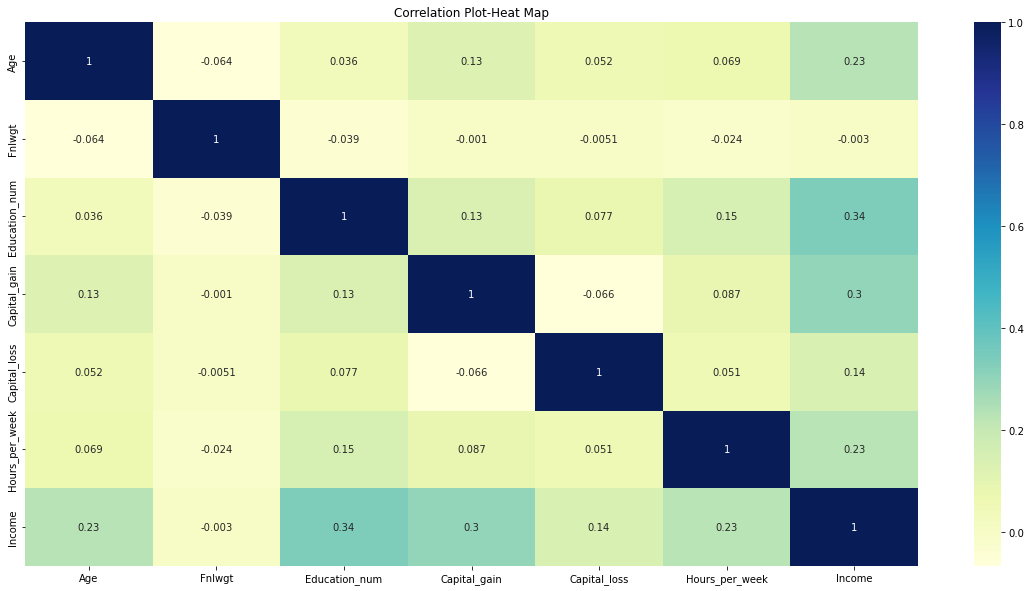

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(df[numer].corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

- correlation between the features is not high

#### using vif to check for multicolinearity

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=df[numer].copy()
t=k.drop(['Income'],axis=1).copy()
d=sc.fit_transform(df)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
2,9.392649,Education_num
0,1.691675,Age
5,1.237959,Hours_per_week
3,1.124614,Capital_gain
1,1.060353,Fnlwgt
4,1.040536,Capital_loss


vif is within the limits less than 10

#### Outliers check

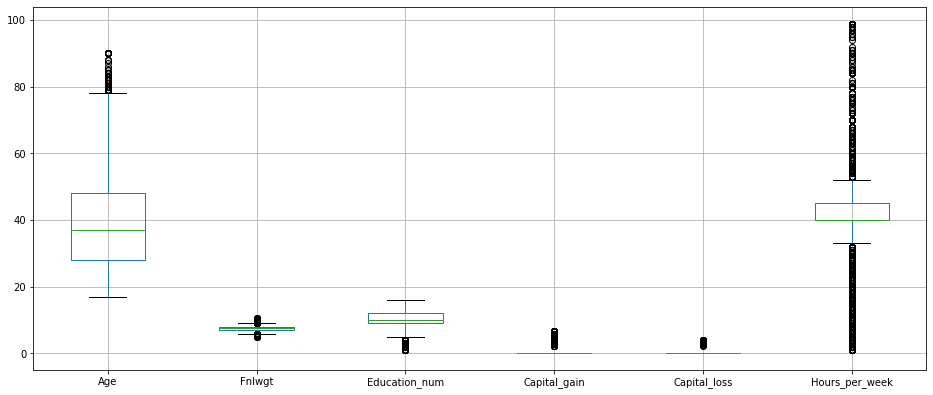

In [77]:
# visualizing
df[numericalCol].iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

presence of outliers

#### using z score for treating

In [78]:
from scipy.stats import zscore
z=np.abs(zscore(df[numericalCol]))
df_x=df[(z<3).all(axis=1)]
data_loss=((df.shape[0]-df_x.shape[0])/df.shape[0])*100
print("data loss ", data_loss, " %")

data loss  12.091222030981069  %


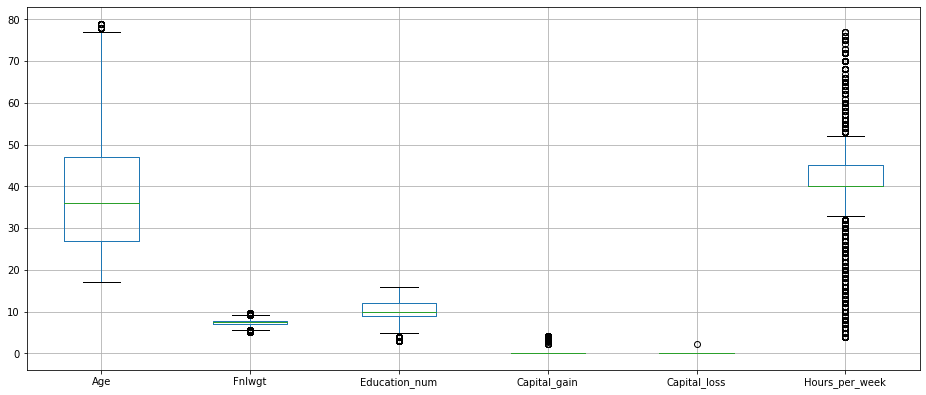

In [79]:
df_x[numericalCol].iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

- outliers present in Hours_per_week 
- tried using outliers method as well but there was no difference in reducing the outliers in hours_per_week


#### Splitting dataset

In [80]:
X_s=df_x.drop(columns=["Income"])
Y=df_x[["Income"]]

#### PCA

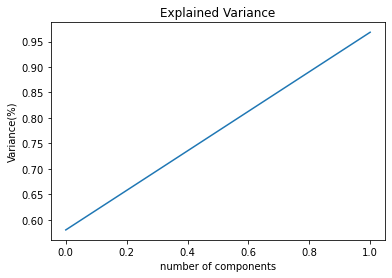

2 0.9681890458775715


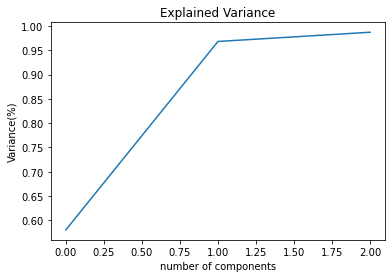

3 0.98716367994333


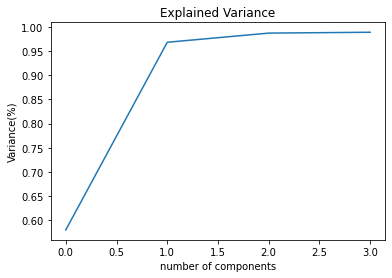

4 0.9889379284842363


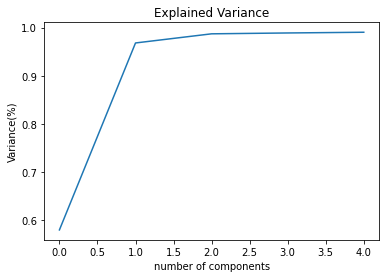

5 0.9904322833477806


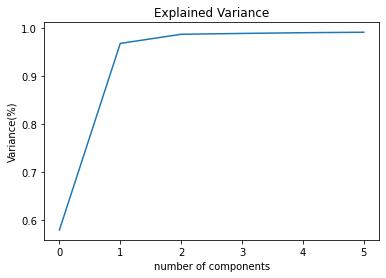

6 0.9914069858284833


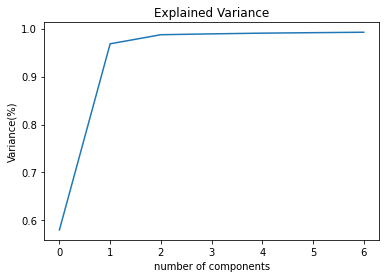

7 0.9923156335623273


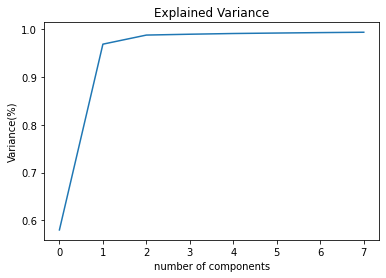

8 0.9930722549425599


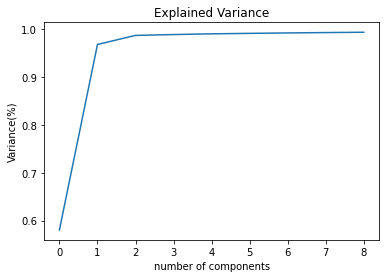

9 0.9937594981376088


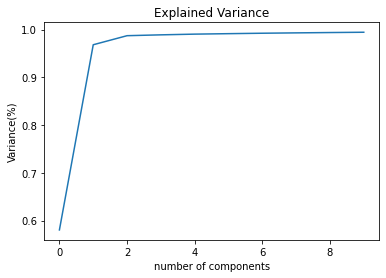

10 0.9943865685003098


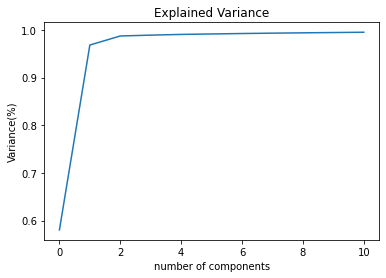

11 0.9949988080610447


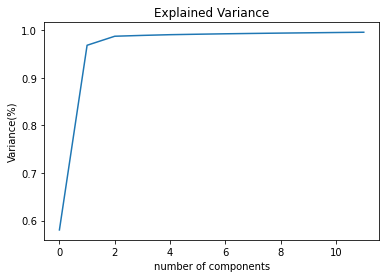

12 0.9955643913911205


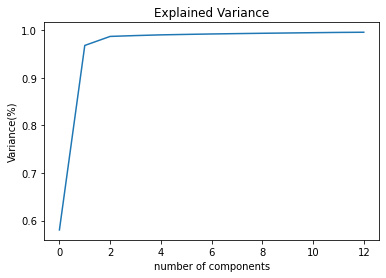

13 0.9959418019753954


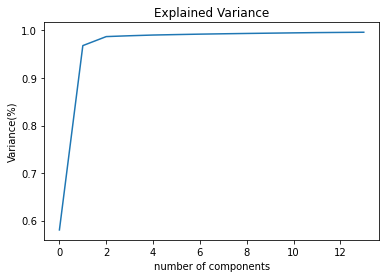

14 0.9963119227252077


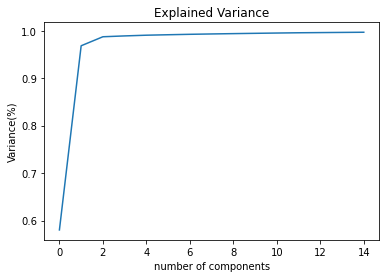

15 0.9966677243207582


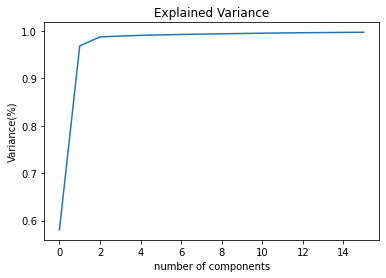

16 0.9970034343111183


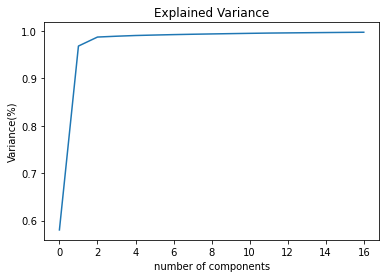

17 0.9973153979827877


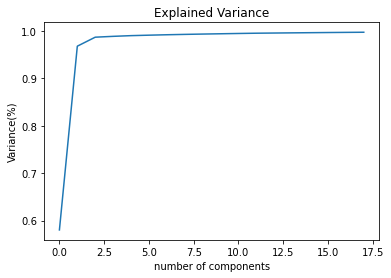

18 0.9976034552418936


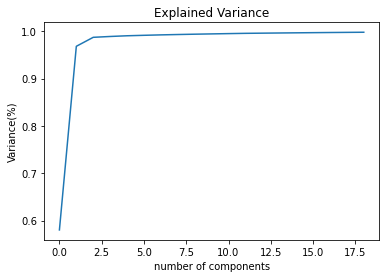

19 0.99788233846448


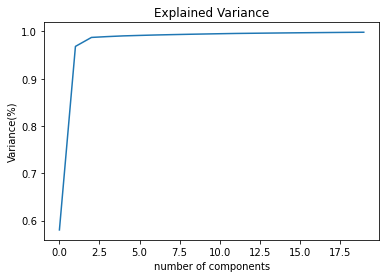

20 0.9981263712909819


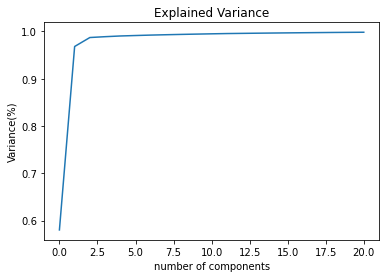

21 0.998335670658078


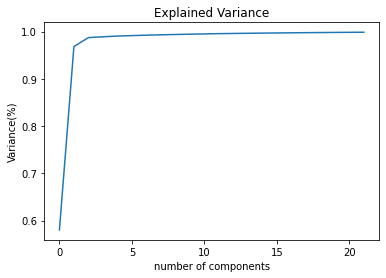

22 0.9985135535792372


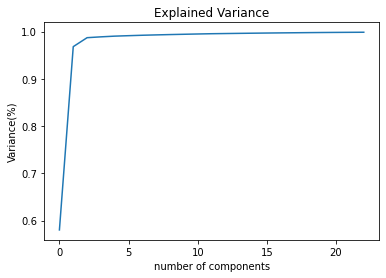

23 0.9986798168005304


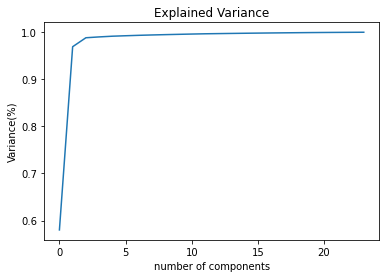

24 0.9988271204843204


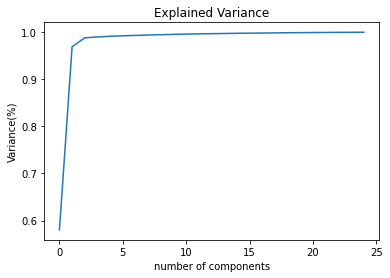

25 0.9989482516122874


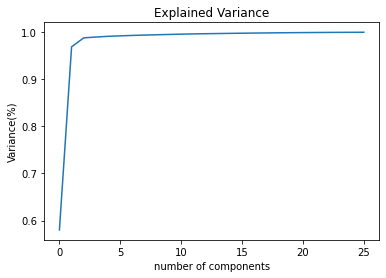

26 0.9990666455318102


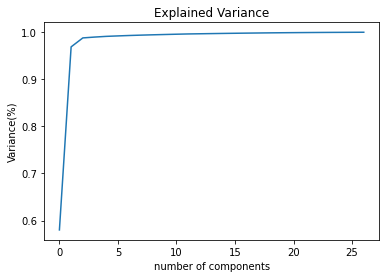

27 0.9991735575800832


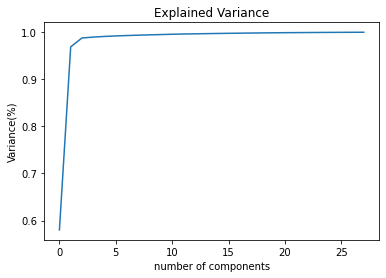

28 0.9992786949711221


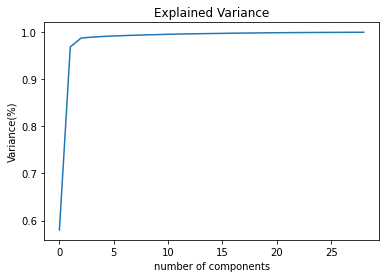

29 0.9993676216827586


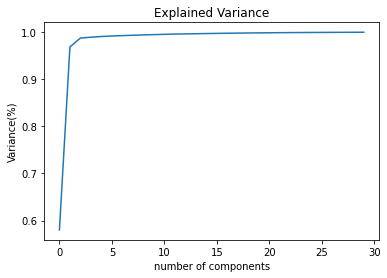

30 0.9994393620843363


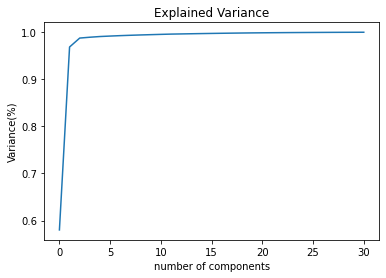

31 0.9995082258705502


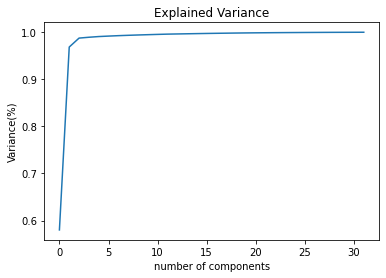

32 0.9995710387733437


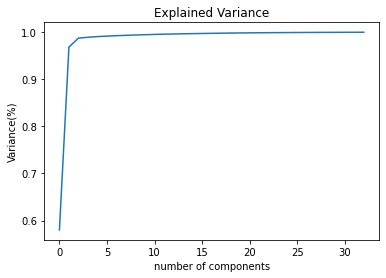

33 0.999626337449646


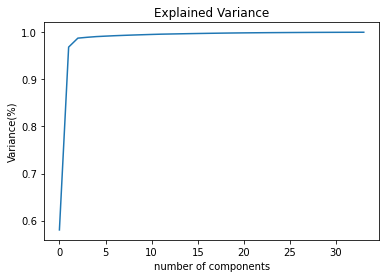

34 0.9996644898110452


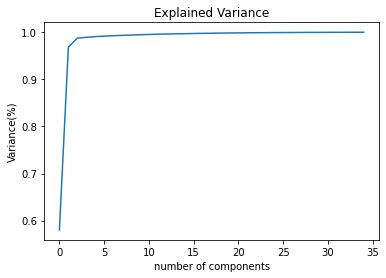

35 0.9996986607274353


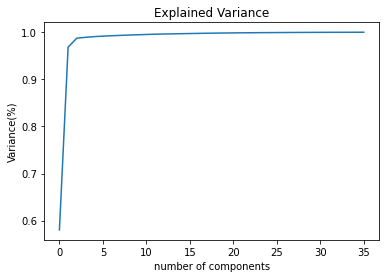

36 0.9997297494645532


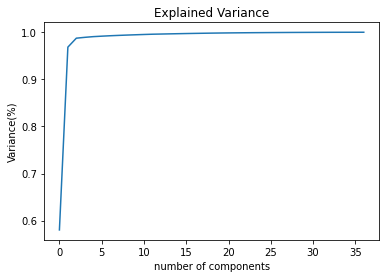

37 0.9997556885971329


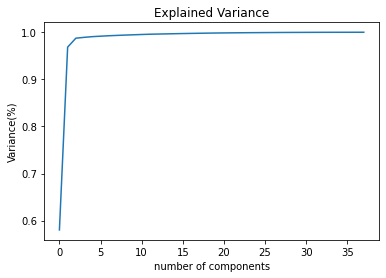

38 0.999773155363712


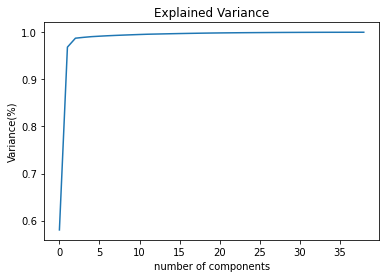

39 0.9997891046516041


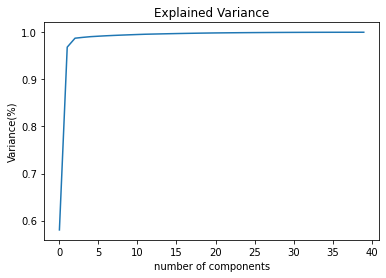

40 0.9998026265655359


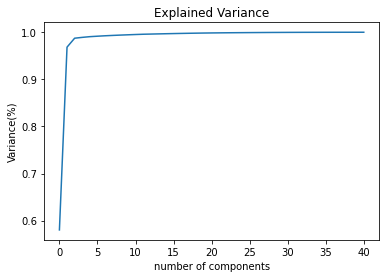

41 0.9998158319962063


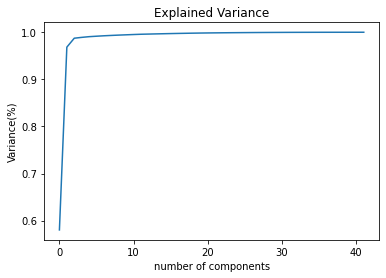

42 0.9998268937188883


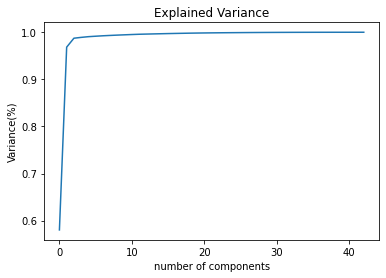

43 0.9998375798289753


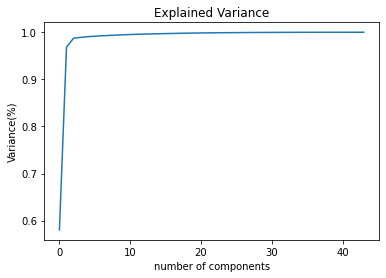

44 0.999846995026324


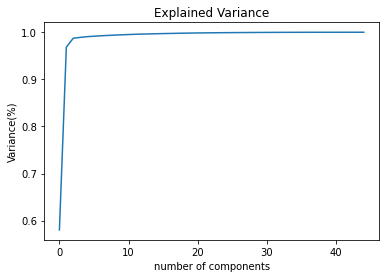

45 0.9998559158229492


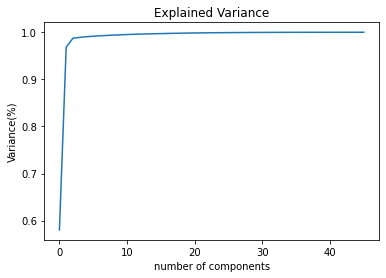

46 0.9998649456710403


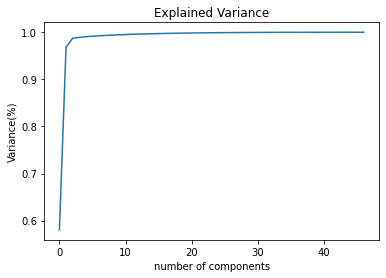

47 0.9998736236044385


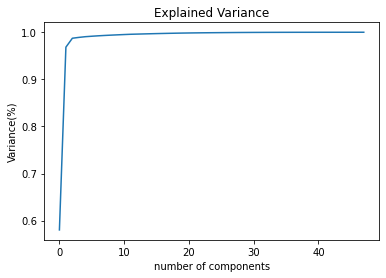

48 0.9998819976386103


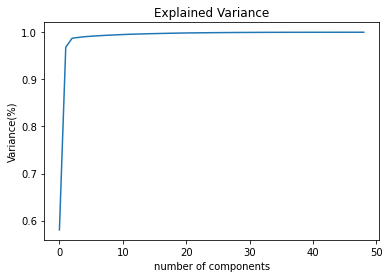

49 0.9998897691318245


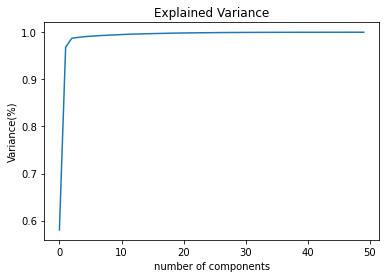

50 0.9998969966341441


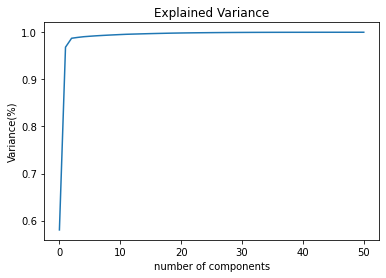

51 0.9999041189993765


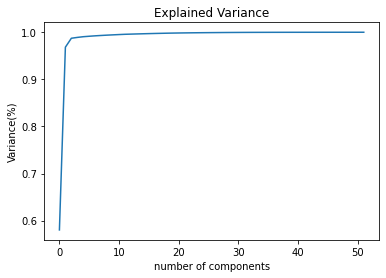

52 0.9999107982718113


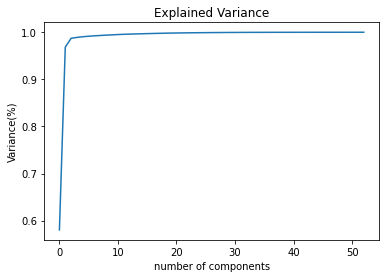

53 0.999917444356508


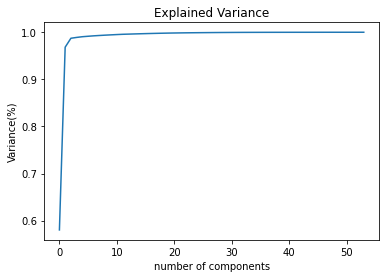

54 0.999923893644291


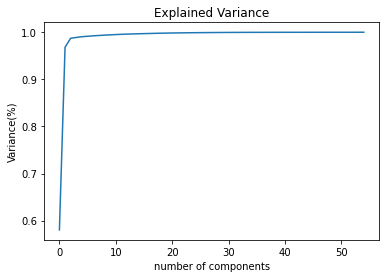

55 0.9999300305692781


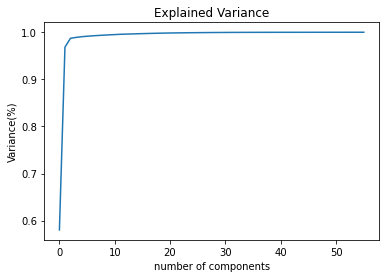

56 0.9999359679438851


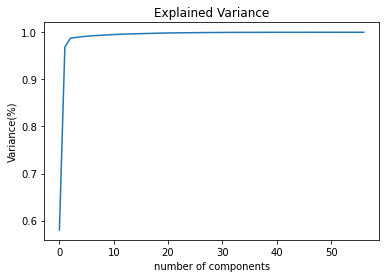

57 0.999941824218111


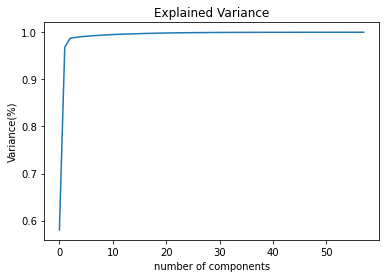

58 0.9999471101916038


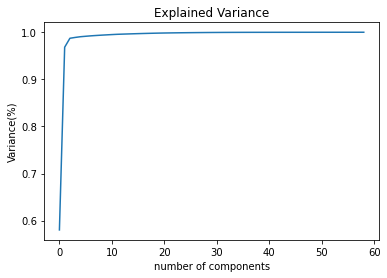

59 0.9999519563296245


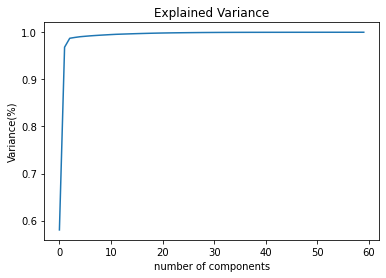

60 0.9999561985132249


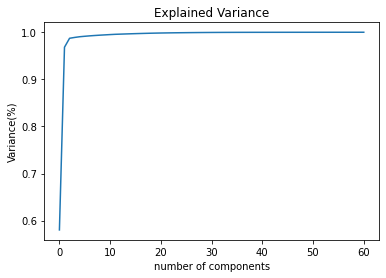

61 0.9999601252140027


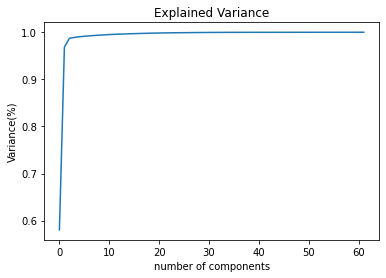

62 0.9999635744914174


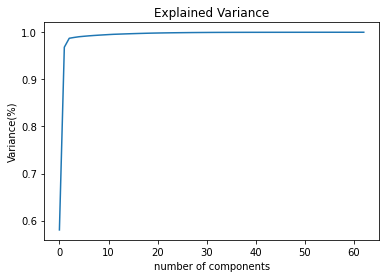

63 0.9999669379882271


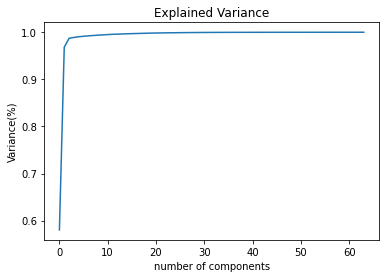

64 0.9999701972967106


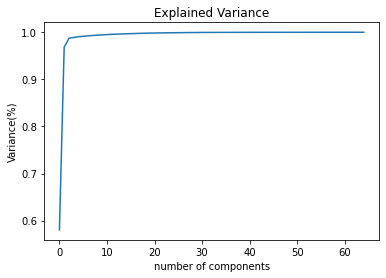

65 0.9999731620319849


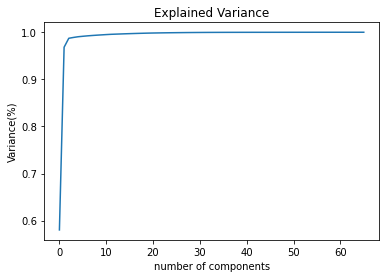

66 0.9999760640345641


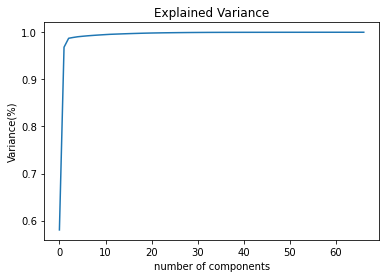

67 0.9999786879777912


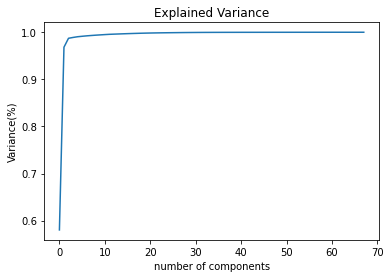

68 0.9999811753855511


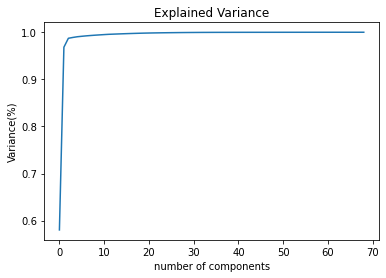

69 0.9999836465216592


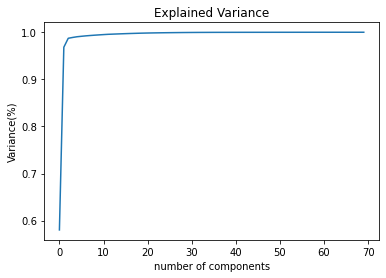

70 0.9999856671538238


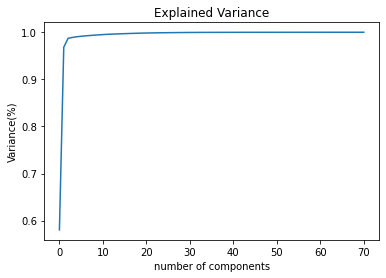

71 0.9999876186702711


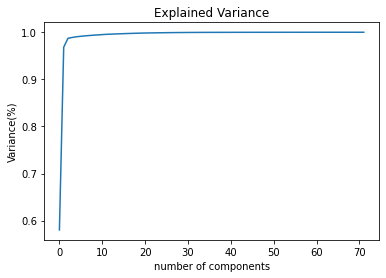

72 0.9999894727038234


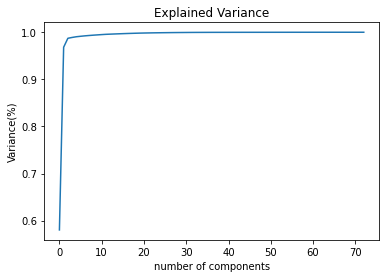

73 0.999991264340944


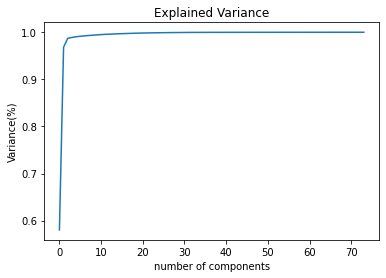

74 0.9999929279944597


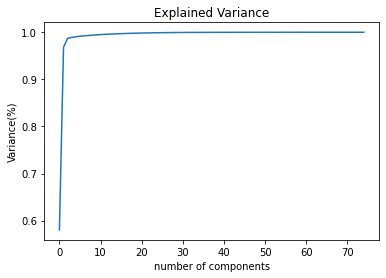

75 0.999994496853745


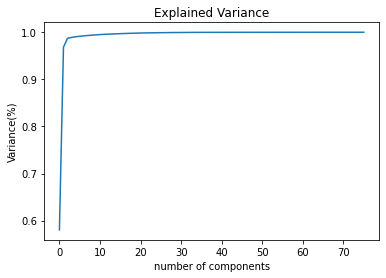

76 0.9999957737527578


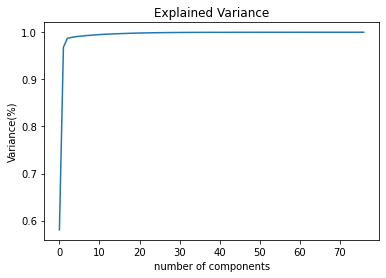

77 0.9999970022774457


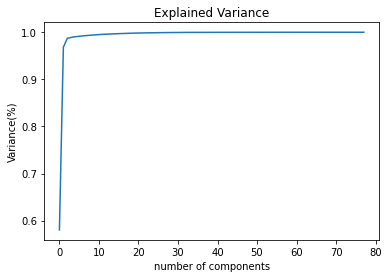

78 0.9999982292217573


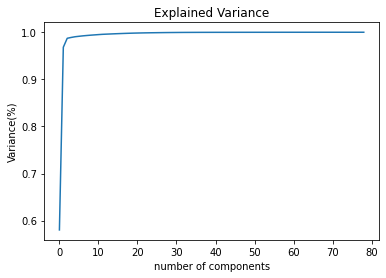

79 0.9999991177818865


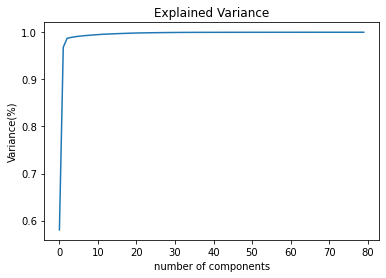

80 0.9999997176851382


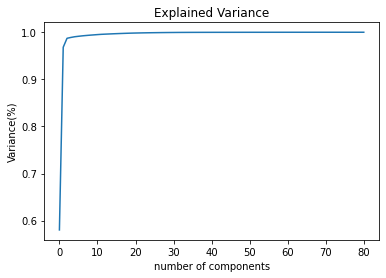

81 0.9999999621405826


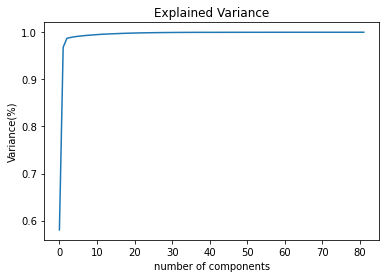

82 1.0000000000000002


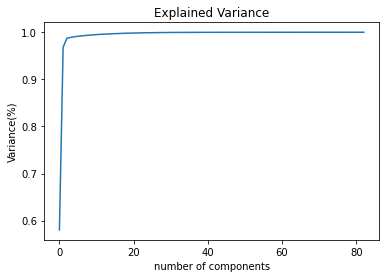

83 1.0000000000000002


In [81]:

from sklearn.decomposition import PCA
for i in range(2,84):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X_s)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel("number of components")
    plt.ylabel('Variance(%)') #for each component
    plt.title('Explained Variance')
    plt.show()
    print(i,sum(pca.explained_variance_ratio_))

In [82]:
pca = PCA(n_components=5) # represents 99.04% of the model
X= pca.fit_transform(X_s)

#### Using SMOTE to balance target

In [83]:

import six
import joblib
import sys
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from imblearn.over_sampling import SMOTE

Income
0         23179
1          5423
dtype: int64


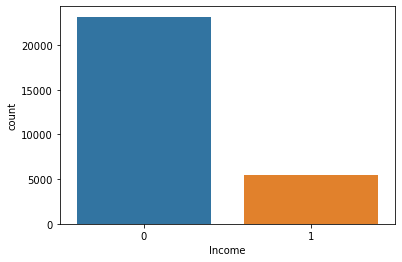

In [84]:
sns.countplot(Y['Income'])
print(Y.value_counts())
plt.show()

ratio of 1 to 0 is 0.235

In [85]:
# by using smote we are adding data to (Yes) 1 such that the ratio between 1 to 0 becomes 0.75
ove_sm=SMOTE(0.75)
X,Y=ove_sm.fit_resample(X,Y)
X

array([[ 5.87886976e+00,  2.86295257e+01, -3.91105102e+00,
         7.07318713e-01, -1.01025465e-01],
       [ 3.19453517e-01, -2.55975922e-01,  1.04629991e+00,
        -3.30281119e-01, -1.31588993e-01],
       [ 1.48899557e+01,  3.24062408e+00,  3.11355156e+00,
        -5.62552670e-01, -1.93278836e-01],
       ...,
       [ 1.47909804e+01, -9.35243203e+00, -4.58451276e+00,
         3.34892689e-01, -1.28356721e-01],
       [ 2.31033107e+01, -5.38582296e+00, -5.23647630e+00,
         1.30454007e-02, -1.45854389e-01],
       [ 7.16928047e+00,  1.21747040e+00, -3.04243844e+00,
        -5.68475116e-01, -1.10812408e-01]])

Income
0         23179
1         17384
dtype: int64


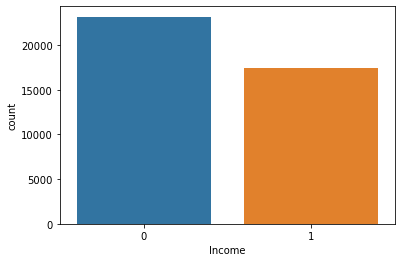

In [86]:
sns.countplot(Y['Income'])
print(Y.value_counts())
plt.show()

the data is balanced, the ratio of 1 to 0 is 0.75

#### Running Algorithm

In [87]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error


from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
A=[]
B=[]
C=[]
D=[]
E=[]
mae=[]

In [88]:
#loop used to find the best random state
def max_aucroc_score(regr,X,Y):
    max_aucroc_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = r_state, test_size=0.20,stratify=Y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        aucroc_scr=(accuracy_score(y_test,y_pred))*100
        print("accuracy score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [89]:
# used to get test accuracy, train accuracy, mse, mae,F1score,confusion matrix,classification report and auc score
def te_t(regr,x_train,x_test,y_train,y_test):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(accuracy_score(y_test,y_te)*100,1)}")
    A.append(round(accuracy_score(y_test,y_te)*100,1))
   
    print(f"train accuracy is {round(accuracy_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))
    
    
    cm = confusion_matrix(y_test, y_te)
    class_label = ["Above 50K", "Less than or equal to 50K"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print('\n')
    
    print("f1 score is : ",f1_score(y_test,y_te))
    E.append(f1_score(y_test,y_te))
    print('\n')
    
    print("classification report \n",classification_report(y_test,y_te))
   

In [90]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(accuracy_score(y_train,y_tr)*100,1)
    te_ac=round(accuracy_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)

In [91]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier()
R=max_aucroc_score(reg,X,Y)

accuracy score corresponding to  0  is  80.14298040182423
accuracy score corresponding to  1  is  79.32947121903119
accuracy score corresponding to  2  is  80.62369037347466
accuracy score corresponding to  3  is  80.26623936891409
accuracy score corresponding to  4  is  79.13225687168742
accuracy score corresponding to  5  is  79.61296684333786
accuracy score corresponding to  6  is  79.09527918156046
accuracy score corresponding to  7  is  79.26784173548626
accuracy score corresponding to  8  is  79.84715888080858
accuracy score corresponding to  9  is  79.15690866510539
accuracy score corresponding to  10  is  79.73622581042771
accuracy score corresponding to  11  is  78.84876124738075
accuracy score corresponding to  12  is  79.39110070257611
accuracy score corresponding to  13  is  79.60064094662886
accuracy score corresponding to  14  is  79.85948477751757
accuracy score corresponding to  15  is  79.6622704301738
accuracy score corresponding to  16  is  78.86108714408974
accuracy

test accuracy is 80.0
train accuracy is 100.0


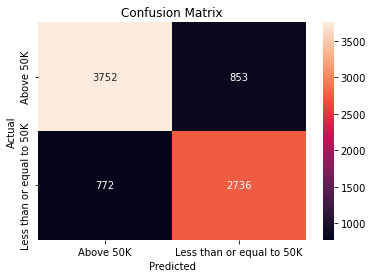



f1 score is :  0.7710300126814147


classification report 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4605
           1       0.76      0.78      0.77      3508

    accuracy                           0.80      8113
   macro avg       0.80      0.80      0.80      8113
weighted avg       0.80      0.80      0.80      8113



At cv is 2 cv score is 77.98  
 test accuracy is 80.0 

At cv is 3 cv score is 79.66  
 test accuracy is 80.0 

At cv is 4 cv score is 79.8  
 test accuracy is 80.0 

At cv is 5 cv score is 79.74  
 test accuracy is 80.0 

At cv is 6 cv score is 79.7  
 test accuracy is 80.0 

At cv is 7 cv score is 80.15  
 test accuracy is 80.0 

At cv is 8 cv score is 80.23  
 test accuracy is 80.0 

At cv is 9 cv score is 80.08  
 test accuracy is 80.0 

At cv is 10 cv score is 80.13  
 test accuracy is 80.0 

At cv is 11 cv score is 80.21  
 test accuracy is 80.0 

At cv is 12 cv score is 80.21  
 test accuracy is

In [92]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test)

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()
R=max_aucroc_score(rf_c,X,Y)

accuracy score corresponding to  0  is  85.84987057808455
accuracy score corresponding to  1  is  85.44311598668803
accuracy score corresponding to  2  is  85.40613829656107
accuracy score corresponding to  3  is  85.77591519783064
accuracy score corresponding to  4  is  84.29680759275237
accuracy score corresponding to  5  is  85.43079008997904
accuracy score corresponding to  6  is  85.50474547023296
accuracy score corresponding to  7  is  84.85147294465672
accuracy score corresponding to  8  is  85.36916060643411
accuracy score corresponding to  9  is  85.08566498212745
accuracy score corresponding to  10  is  85.70195981757674
accuracy score corresponding to  11  is  84.56797732035005
accuracy score corresponding to  12  is  84.95008011832861
accuracy score corresponding to  13  is  85.57870085048688
accuracy score corresponding to  14  is  85.51707136694195
accuracy score corresponding to  15  is  85.7266116109947
accuracy score corresponding to  16  is  85.03636139529151
accuracy

test accuracy is 85.2
train accuracy is 100.0


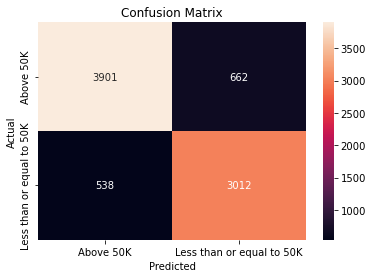



f1 score is :  0.8338870431893688


classification report 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      4563
           1       0.82      0.85      0.83      3550

    accuracy                           0.85      8113
   macro avg       0.85      0.85      0.85      8113
weighted avg       0.85      0.85      0.85      8113



At cv is 2 cv score is 84.0  
 test accuracy is 85.2 

At cv is 3 cv score is 85.48  
 test accuracy is 85.2 

At cv is 4 cv score is 85.54  
 test accuracy is 85.2 

At cv is 5 cv score is 85.86  
 test accuracy is 85.2 

At cv is 6 cv score is 85.88  
 test accuracy is 85.2 

At cv is 7 cv score is 85.91  
 test accuracy is 85.2 

At cv is 8 cv score is 85.88  
 test accuracy is 85.2 

At cv is 9 cv score is 85.93  
 test accuracy is 85.2 

At cv is 10 cv score is 85.98  
 test accuracy is 85.2 

At cv is 11 cv score is 86.05  
 test accuracy is 85.2 

At cv is 12 cv score is 86.13  
 test accuracy i

In [94]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_c,x2_train,x2_test,y2_train,y2_test)
print('\n')
score(rf_c,x2_train,x2_test,y2_train,y2_test)

In [95]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
R=max_aucroc_score(kc,X,Y)

accuracy score corresponding to  0  is  77.93664489091582
accuracy score corresponding to  1  is  78.33107358560335
accuracy score corresponding to  2  is  78.23246641193147
accuracy score corresponding to  3  is  78.4543325526932
accuracy score corresponding to  4  is  76.93824725748797
accuracy score corresponding to  5  is  77.82571182053495
accuracy score corresponding to  6  is  77.22174288179465
accuracy score corresponding to  7  is  76.76568470356219
accuracy score corresponding to  8  is  77.61617157648219
accuracy score corresponding to  9  is  77.24639467521263
accuracy score corresponding to  10  is  77.61617157648219
accuracy score corresponding to  11  is  77.59151978306423
accuracy score corresponding to  12  is  77.99827437446073
accuracy score corresponding to  13  is  77.71477875015408
accuracy score corresponding to  14  is  78.40502896585727
accuracy score corresponding to  15  is  78.09688154813263
accuracy score corresponding to  16  is  77.3573277455935
accuracy 

test accuracy is 77.3
train accuracy is 85.2


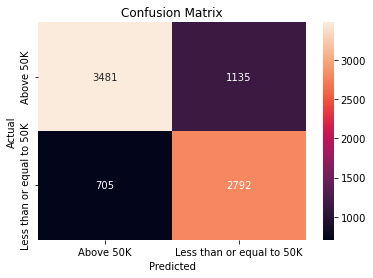



f1 score is :  0.7521551724137931


classification report 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      4616
           1       0.71      0.80      0.75      3497

    accuracy                           0.77      8113
   macro avg       0.77      0.78      0.77      8113
weighted avg       0.78      0.77      0.77      8113



At cv is 2 cv score is 76.67  
 test accuracy is 77.3 

At cv is 3 cv score is 78.02  
 test accuracy is 77.3 

At cv is 4 cv score is 78.02  
 test accuracy is 77.3 

At cv is 5 cv score is 78.26  
 test accuracy is 77.3 

At cv is 6 cv score is 78.38  
 test accuracy is 77.3 

At cv is 7 cv score is 78.4  
 test accuracy is 77.3 

At cv is 8 cv score is 78.38  
 test accuracy is 77.3 

At cv is 9 cv score is 78.47  
 test accuracy is 77.3 

At cv is 10 cv score is 78.57  
 test accuracy is 77.3 

At cv is 11 cv score is 78.53  
 test accuracy is 77.3 

At cv is 12 cv score is 78.61  
 test accuracy i

In [96]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(kc,x3_train,x3_test,y3_train,y3_test)
print('\n')
score(kc,x3_train,x3_test,y3_train,y3_test)

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
grad_c=GradientBoostingClassifier()
R=max_aucroc_score(grad_c,X,Y)


accuracy score corresponding to  0  is  79.62529274004683
accuracy score corresponding to  1  is  78.8857389375077
accuracy score corresponding to  2  is  79.55133735979292
accuracy score corresponding to  3  is  79.21853814865032
accuracy score corresponding to  4  is  79.0583014914335
accuracy score corresponding to  5  is  79.94576605448046
accuracy score corresponding to  6  is  78.92271662763466
accuracy score corresponding to  7  is  78.49131024282016
accuracy score corresponding to  8  is  79.57598915321088
accuracy score corresponding to  9  is  78.54061382965611
accuracy score corresponding to  10  is  79.35412301244915
accuracy score corresponding to  11  is  78.52828793294712
accuracy score corresponding to  12  is  79.08295328485147
accuracy score corresponding to  13  is  79.21853814865032
accuracy score corresponding to  14  is  79.0583014914335
accuracy score corresponding to  15  is  79.13225687168742
accuracy score corresponding to  16  is  78.19548872180451
accuracy s

test accuracy is 78.9
train accuracy is 79.8


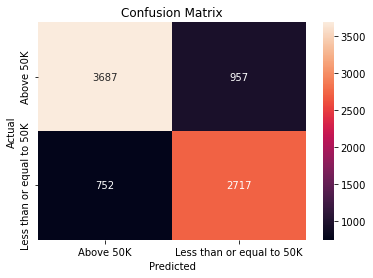



f1 score is :  0.7607447851042979


classification report 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      4644
           1       0.74      0.78      0.76      3469

    accuracy                           0.79      8113
   macro avg       0.79      0.79      0.79      8113
weighted avg       0.79      0.79      0.79      8113



At cv is 2 cv score is 78.89  
 test accuracy is 78.9 

At cv is 3 cv score is 78.88  
 test accuracy is 78.9 

At cv is 4 cv score is 78.98  
 test accuracy is 78.9 

At cv is 5 cv score is 78.98  
 test accuracy is 78.9 

At cv is 6 cv score is 78.99  
 test accuracy is 78.9 

At cv is 7 cv score is 79.09  
 test accuracy is 78.9 

At cv is 8 cv score is 78.96  
 test accuracy is 78.9 

At cv is 9 cv score is 79.09  
 test accuracy is 78.9 

At cv is 10 cv score is 79.09  
 test accuracy is 78.9 

At cv is 11 cv score is 79.04  
 test accuracy is 78.9 

At cv is 12 cv score is 79.0  
 test accuracy i

In [98]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(grad_c,x4_train,x4_test,y4_train,y4_test)
print('\n')
score(grad_c,x4_train,x4_test,y4_train,y4_test)

In [99]:
from sklearn.ensemble import AdaBoostClassifier
adboost_c=AdaBoostClassifier()
R=max_aucroc_score(adboost_c,X,Y)

accuracy score corresponding to  0  is  77.34500184888451
accuracy score corresponding to  1  is  77.23406877850364
accuracy score corresponding to  2  is  77.99827437446073
accuracy score corresponding to  3  is  77.54221619622828
accuracy score corresponding to  4  is  77.16011339824972
accuracy score corresponding to  5  is  78.56526562307408
accuracy score corresponding to  6  is  77.03685443115987
accuracy score corresponding to  7  is  77.1847651916677
accuracy score corresponding to  8  is  78.0352520645877
accuracy score corresponding to  9  is  76.88894367065204
accuracy score corresponding to  10  is  77.67780106002712
accuracy score corresponding to  11  is  77.07383212128683
accuracy score corresponding to  12  is  77.07383212128683
accuracy score corresponding to  13  is  77.67780106002712
accuracy score corresponding to  14  is  77.28337236533957
accuracy score corresponding to  15  is  78.19548872180451
accuracy score corresponding to  16  is  77.22174288179465
accuracy 

test accuracy is 77.8
train accuracy is 77.8


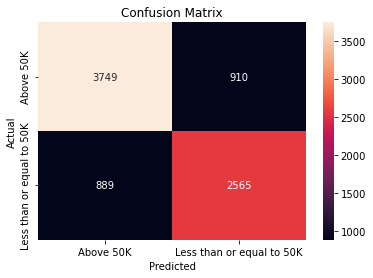



f1 score is :  0.7403665752633858


classification report 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      4659
           1       0.74      0.74      0.74      3454

    accuracy                           0.78      8113
   macro avg       0.77      0.77      0.77      8113
weighted avg       0.78      0.78      0.78      8113



At cv is 2 cv score is 77.57  
 test accuracy is 77.8 

At cv is 3 cv score is 77.52  
 test accuracy is 77.8 

At cv is 4 cv score is 77.44  
 test accuracy is 77.8 

At cv is 5 cv score is 77.52  
 test accuracy is 77.8 

At cv is 6 cv score is 77.29  
 test accuracy is 77.8 

At cv is 7 cv score is 77.39  
 test accuracy is 77.8 

At cv is 8 cv score is 77.45  
 test accuracy is 77.8 

At cv is 9 cv score is 77.42  
 test accuracy is 77.8 

At cv is 10 cv score is 77.53  
 test accuracy is 77.8 

At cv is 11 cv score is 77.49  
 test accuracy is 77.8 

At cv is 12 cv score is 77.39  
 test accuracy 

In [100]:
x5_train,x5_test,y5_train,y5_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(adboost_c,x5_train,x5_test,y5_train,y5_test)
print('\n')
score(adboost_c,x5_train,x5_test,y5_train,y5_test)

In [101]:
from sklearn.metrics import roc_curve,auc
area=[]

In [102]:
y_te=reg.predict(x1_test)
fpr1,tpr1,threshold1=roc_curve(y_te,y1_test)
roc_auc1= auc(fpr1, tpr1)
area.append(roc_auc1)
print("Area under the Decision Tree ROC curve : %f" % roc_auc1)

Area under the Decision Tree ROC curve : 0.795842


In [103]:
y_te=rf_c.predict(x2_test)
fpr2,tpr2,threshold2=roc_curve(y_te,y2_test)
roc_auc2= auc(fpr2, tpr2)
area.append(roc_auc2)
print("Area under the Random Forest ROC curve : %f" % roc_auc2)

Area under the Random Forest ROC curve : 0.849308


In [104]:
y_te=kc.predict(x3_test)
fpr3,tpr3,threshold3=roc_curve(y_te,y3_test)
roc_auc3= auc(fpr3, tpr3)
area.append(roc_auc3)
print("Area under the KNN ROC curve : %f" % roc_auc3)

Area under the KNN ROC curve : 0.771278


In [105]:
y_te=grad_c.predict(x4_test)
fpr4,tpr4,threshold4=roc_curve(y_te,y4_test)
roc_auc4= auc(fpr4, tpr4)
area.append(roc_auc4)
print("Area under the Grad boost ROC curve : %f" % roc_auc4)

Area under the Grad boost ROC curve : 0.785057


In [106]:
y_te=adboost_c.predict(x5_test)
fpr5,tpr5,threshold5=roc_curve(y_te,y5_test)
roc_auc5= auc(fpr5, tpr5)
area.append(roc_auc5)
print("Area under the ada boost ROC curve : %f" % roc_auc5)

Area under the ada boost ROC curve : 0.773226


#### Creating Table to store datas

In [107]:
aa=['DT','RF','KNN','GRAD','adaboost']

In [108]:
kk=pd.DataFrame({'test accuracy':A,'max_cv_score': B,'diff':D,'mse':C,'mae':mae,'F1 score':E,'roc_curve_area':area},index=aa)
kk.sort_values(by=['diff','test accuracy', 'mse', 'mae' ])

,test accuracy,max_cv_score,diff,mse,mae,F1 score,roc_curve_area
GRAD,78.9,79.091783,0.012824,0.210650,0.210650,0.760745,0.785057
DT,80.0,80.625275,0.077904,0.200296,0.200296,0.771030,0.795842
adaboost,77.8,77.644724,0.155276,0.221743,0.221743,0.740367,0.773226
RF,85.2,86.236319,0.276912,0.147911,0.147911,0.833887,0.849308
KNN,77.3,78.751825,0.634060,0.226796,0.226796,0.752155,0.771278


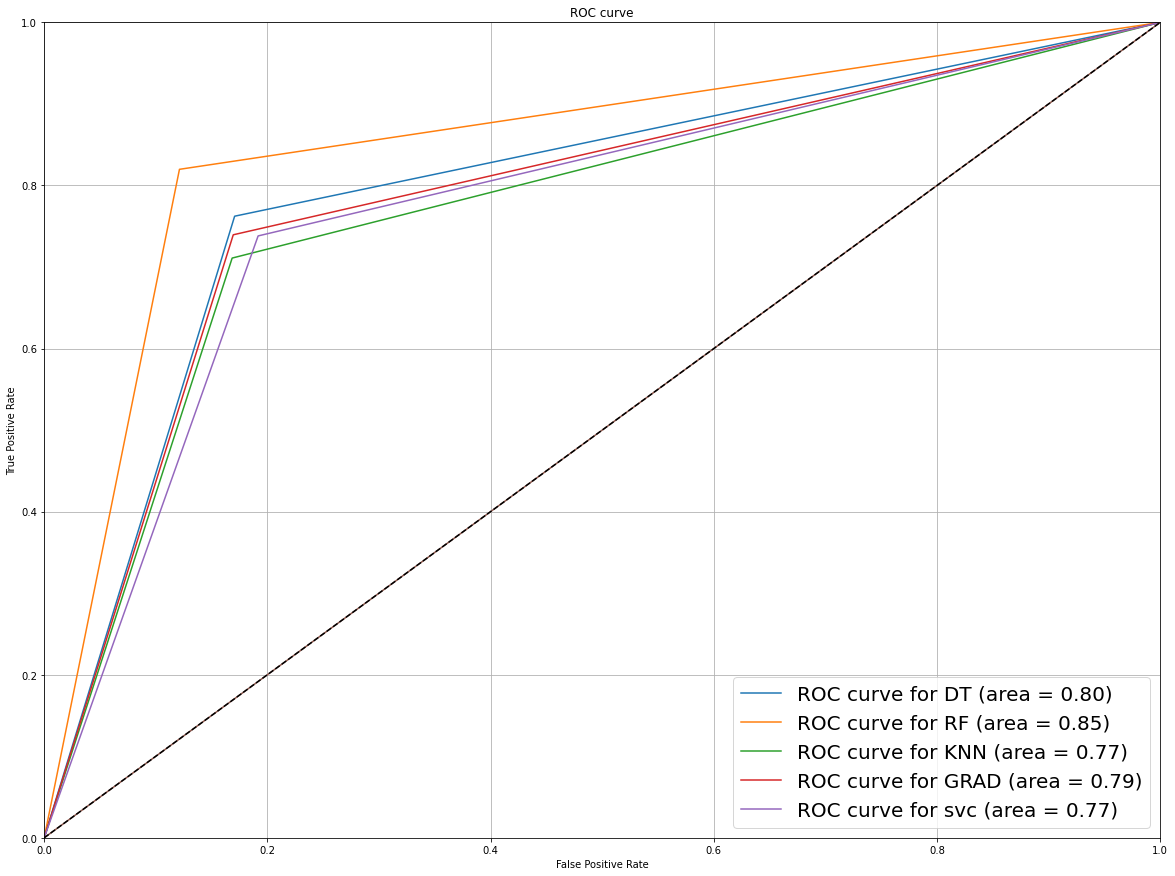

In [109]:
plt.figure(figsize = (20,15))

plt.plot(fpr1, tpr1, label = 'ROC curve for DT (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label = 'ROC curve for RF (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label = 'ROC curve for KNN (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label = 'ROC curve for GRAD (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label = 'ROC curve for svc (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], [0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)
plt.show()

#### inference

- Random Forest is the best model 
    - Highest roc_curve
    - highest test accuracy and cv_score
    - 3rd least difference between cv_score and test accuracy
    - least error compared to other models
    - highest F1 score

#### Hyper paramter tuning

In [110]:
from sklearn.model_selection import GridSearchCV

In [130]:
par={'n_estimators': [250, 300, 350], 
     'max_features': ['log2', 'sqrt','auto'],
     'criterion': ['entropy', 'gini'],
     'max_depth': [50,55,60,65],
     'min_samples_split':[2, 3, 4]
}

In [131]:
grid=GridSearchCV( rf_c,par,cv=2)
grid.fit(x2_train,y2_train)
grid.best_params_  

{'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 300}

In [136]:
rf=RandomForestClassifier( criterion= 'entropy', max_depth = 60, max_features= 'log2', min_samples_split= 2, n_estimators= 300)
rf.fit(x2_train,y2_train)
y_te=rf.predict(x2_test)
r2=round(accuracy_score(y2_test,y_te)*100,2)
print(r2)

85.43


In [137]:
cv_score=cross_val_score(rf,X,Y,cv=3)
cv_mean=round(cv_score.mean()*100,2)
print(cv_mean)

85.45


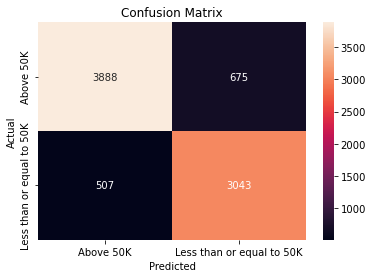

In [138]:
#confusion matrix
cm = confusion_matrix(y2_test, y_te)
class_label = ["Above 50K", "Less than or equal to 50K"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print('\n')

- test accuracy increased and cv_score decreased
- difference between test accuracy and cv_score reduced to 0.02
- FN has decreased, aim is to predict if person make more than 50K FN implies the person actually makes less than or equal to 50K but model predicts the person to make more than 50K, this no has be reduced after tuning

#### Storing model and loading it

In [139]:
import pickle
filename='Census Income Project.pkl'
pickle.dump(rf,open(filename,'wb'))

In [140]:
l_m=pickle.load(open('Census Income Project.pkl','rb'))
re=l_m.score(x2_test,y2_test)
print(re*100)

85.43079008997904
